# DATA RETREVING

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import matthews_corrcoef

df=pd.read_csv('Telecom-Industry-Customers-Churn-data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# DATA DESCRIPTION AND PROCESSING

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# COLUMNS PROCESSING

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [8]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,yes


# EXPLORATORY DATA ANALYSIS

In [9]:
df.churn = (df.churn == 'yes').astype(int)

In [10]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [11]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [13]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [14]:
global_mean = df.churn.mean()
round(global_mean, 3)

0.265

# PLOTS AND VISUZLIZATION

### BINARY CATEGORIES PLOTS

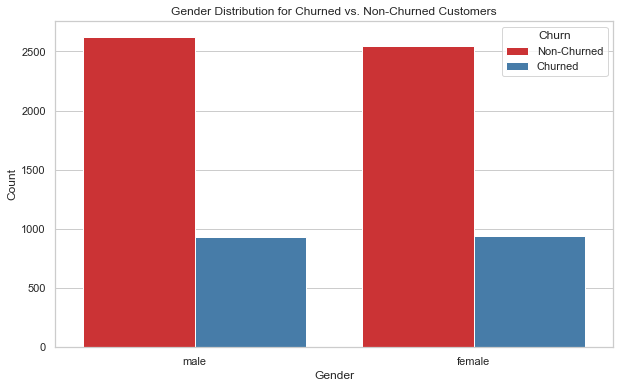

In [15]:
def plot_gender_distribution(df, churn_column, gender_column):
    # Create a DataFrame for churned and non-churned customers
    churned_df = df[df[churn_column] == 1]
    non_churned_df = df[df[churn_column] == 0]

    # Create a combined DataFrame for both churned and non-churned customers
    combined_df = pd.concat([churned_df, non_churned_df])

    # Plot the distribution of gender for both churned and non-churned customers
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=combined_df, x=gender_column, hue=churn_column, palette="Set1")
    plt.title("Gender Distribution for Churned vs. Non-Churned Customers")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.legend(title="Churn", loc="upper right", labels=["Non-Churned", "Churned"])
    plt.show()

plot_gender_distribution(df, 'churn', 'gender')


approximatly same rate of churn among both Genders (Male and Female)

In [16]:
def plot_churn_vs_other(df,other_column,other_col1,other_col2):
    # Group the data by 'SeniorCitizen' and 'Churn' columns
    grouped_data = df.groupby([other_column, 'churn']).size().unstack()

    # Create a stacked bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    title="Churn vs "+other_column
    plt.title(title)
    plt.xlabel(other_column)
    plt.ylabel("Count")
    plt.xticks([0, 1], [other_col1, other_col2], rotation=0)
    plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right")

    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()


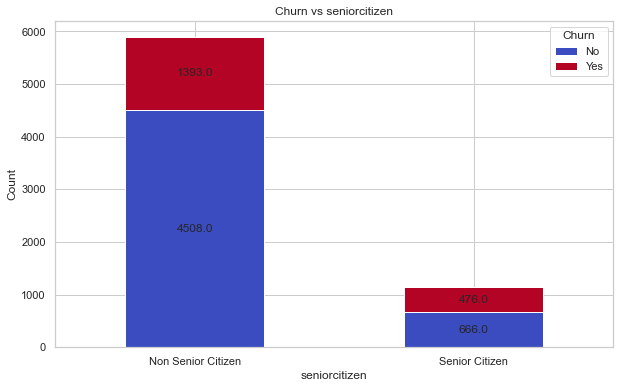

In [17]:
plot_churn_vs_other(df,'seniorcitizen','Non Senior Citizen', 'Senior Citizen')

the senoir are more likely to churn by 18% although we can not overlook the Senoir and non Senoirs citizens data particiapation

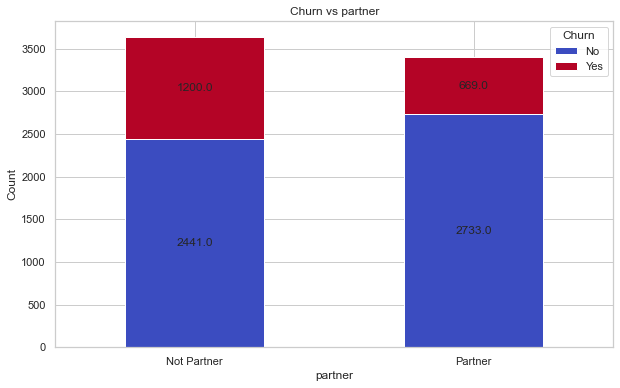

In [18]:
plot_churn_vs_other(df,'partner','Not Partner', 'Partner')

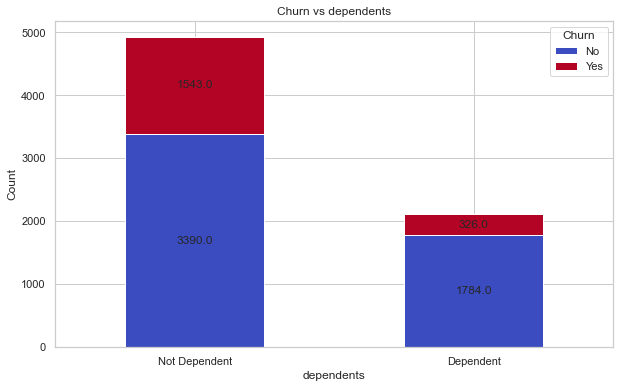

In [19]:
plot_churn_vs_other(df,'dependents','Not Dependent', 'Dependent')

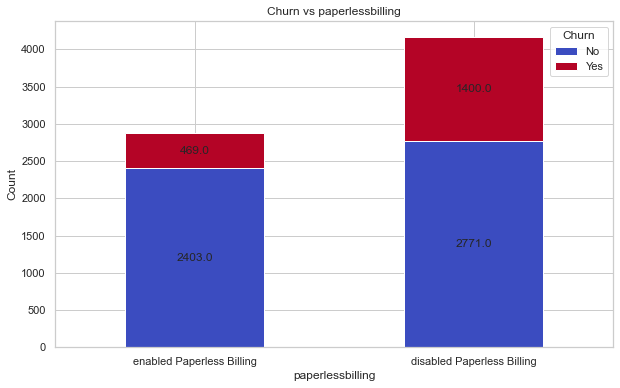

In [20]:
plot_churn_vs_other(df,'paperlessbilling','enabled Paperless Billing', 'disabled Paperless Billing')

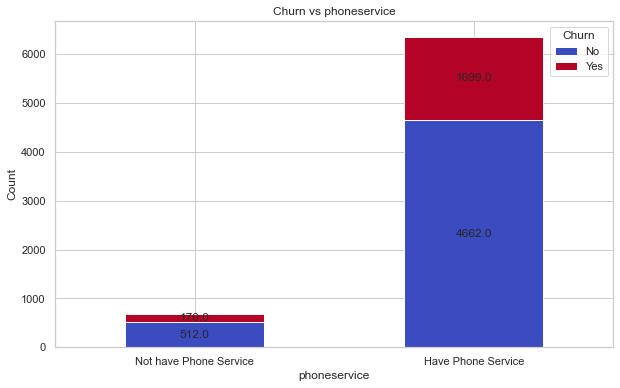

In [21]:
plot_churn_vs_other(df,'phoneservice','Not have Phone Service', 'Have Phone Service')

### MORE THEN 2 CATEGORIES PLOT

In [22]:
def plot_churn_vs_others_with_more_categories(df, other_column):
    # Group the data by 'SeniorCitizen' and 'Churn' columns
    grouped_data = df.groupby([other_column, 'churn']).size().unstack()
    
    # Create a stacked bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    title = "Churn vs " + other_column
    plt.title(title)
    plt.xlabel(other_column)
    plt.ylabel("Count")
    
    # Use the index of the DataFrame as xticks
    plt.xticks(range(len(df[other_column].unique())), df[other_column].unique(), rotation=0)
    plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right")

    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

    plt.show()

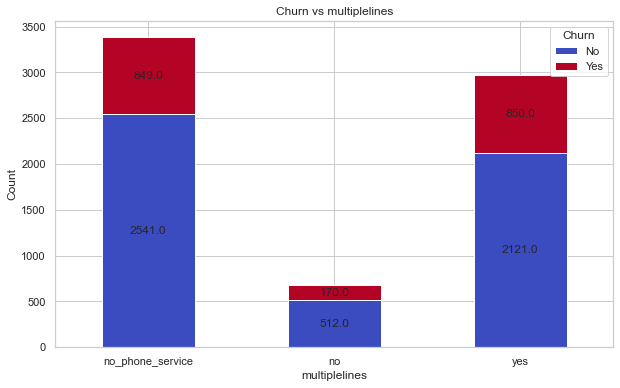

In [23]:
plot_churn_vs_others_with_more_categories(df,'multiplelines')

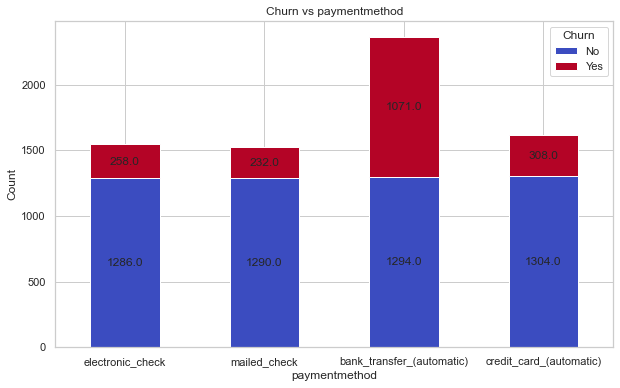

In [24]:
plot_churn_vs_others_with_more_categories(df,'paymentmethod')

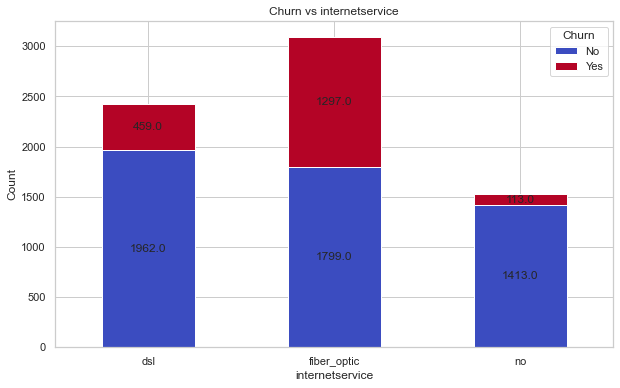

In [25]:
plot_churn_vs_others_with_more_categories(df,'internetservice')

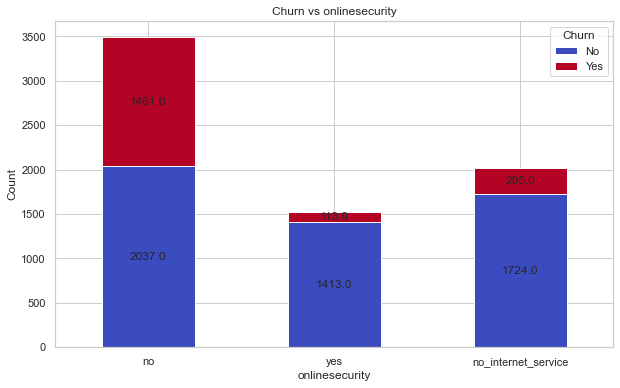

In [26]:
plot_churn_vs_others_with_more_categories(df,'onlinesecurity')

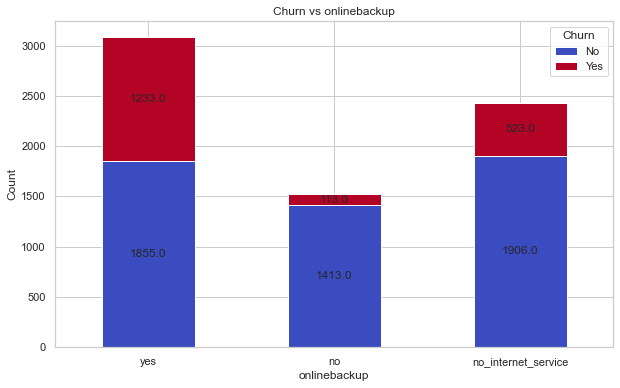

In [27]:
plot_churn_vs_others_with_more_categories(df,'onlinebackup')

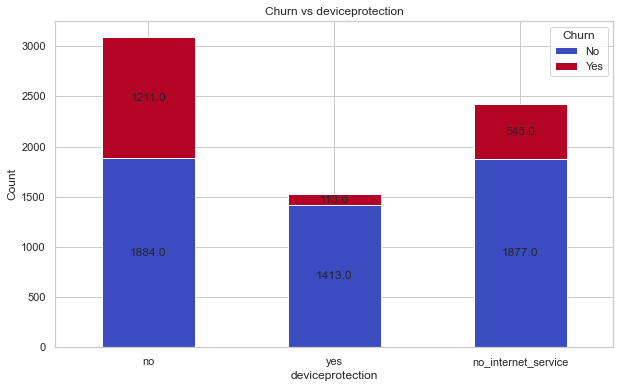

In [28]:
plot_churn_vs_others_with_more_categories(df,'deviceprotection')

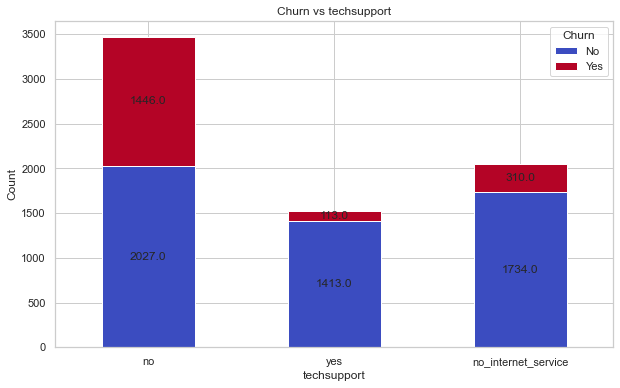

In [29]:
plot_churn_vs_others_with_more_categories(df,'techsupport')

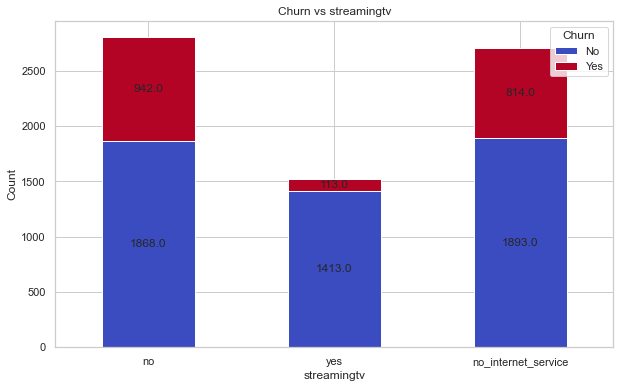

In [30]:
plot_churn_vs_others_with_more_categories(df,'streamingtv')

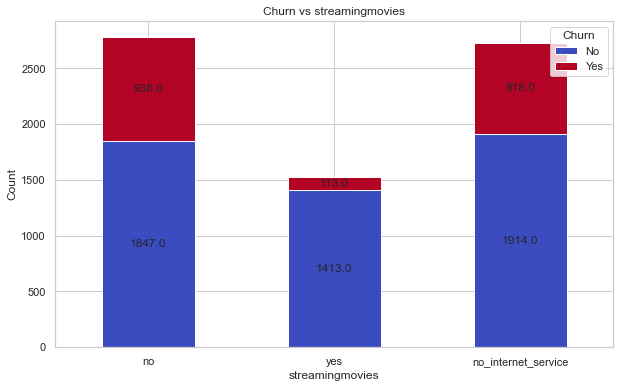

In [31]:
plot_churn_vs_others_with_more_categories(df,'streamingmovies')

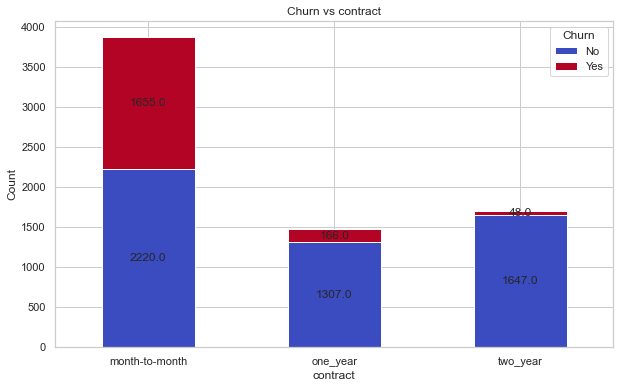

In [32]:
plot_churn_vs_others_with_more_categories(df,'contract')

# COMBINED PLOTS

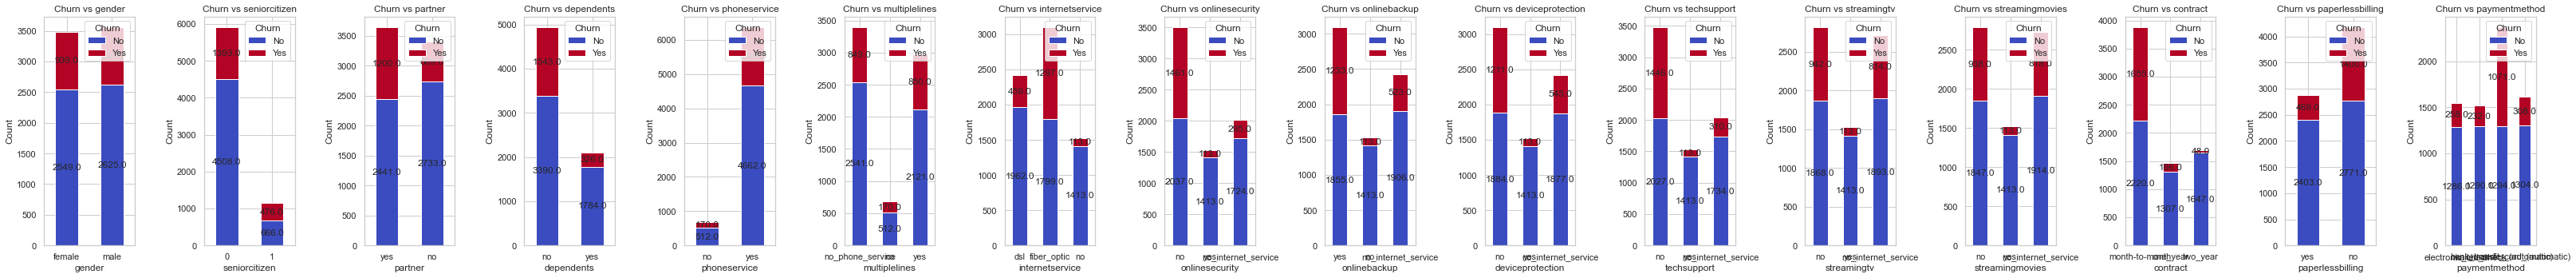

In [33]:
def plot_churn_vs_categorical_columns(df, categorical_columns):
    num_columns = len(categorical_columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(45, 5))
    
    for i, column in enumerate(categorical_columns):
        # Group the data by the categorical column and 'Churn'
        grouped_data = df.groupby([column, 'churn']).size().unstack()
        
        # Create a stacked bar chart for each categorical column
        ax = grouped_data.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[i])
        title = f"Churn vs {column}"
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        ax.set_xticks(range(len(df[column].unique())))
        ax.set_xticklabels(df[column].unique(), rotation=0)
        ax.legend(title="Churn", labels=["No", "Yes"], loc="upper right")

        # Add labels to the bars
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

    plt.tight_layout()
    plt.show()

plot_churn_vs_categorical_columns(df,categorical)


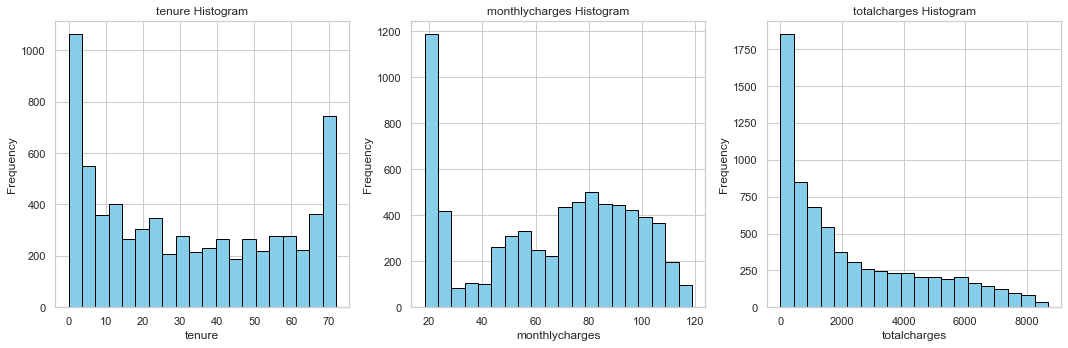

In [34]:
def visualize_numerical_columns(df, numerical_columns):
    num_columns = len(numerical_columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 5))
    
    for i, column in enumerate(numerical_columns):
        ax = axes[i]
        df[column].plot(kind='hist', bins=20, ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'{column} Histogram')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

visualize_numerical_columns(df, numerical)


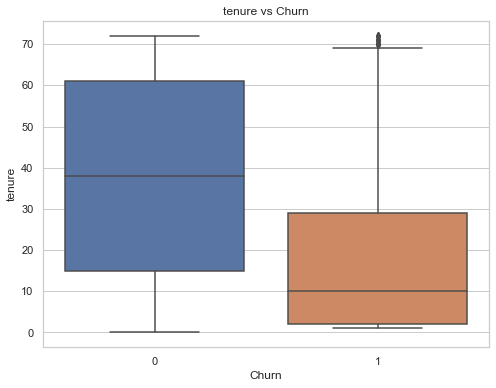

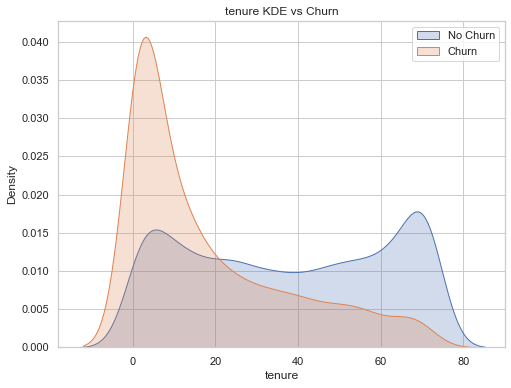

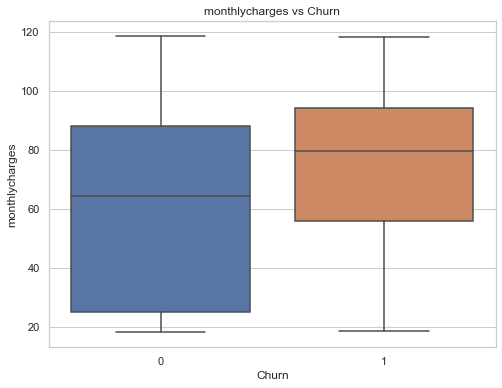

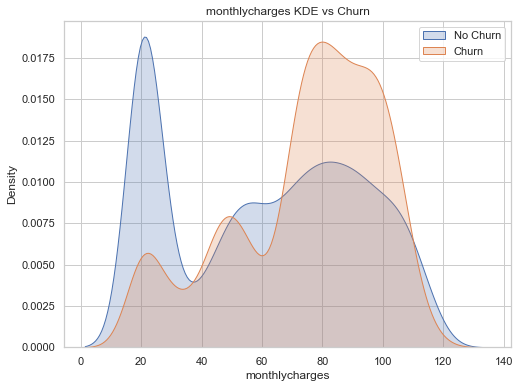

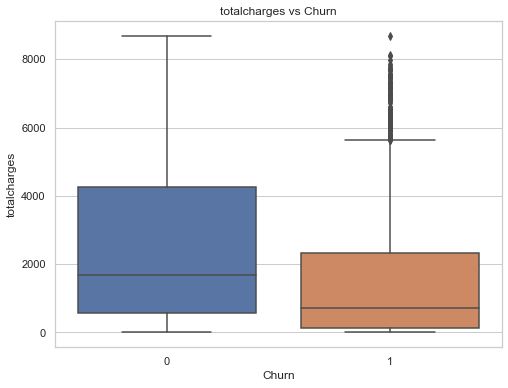

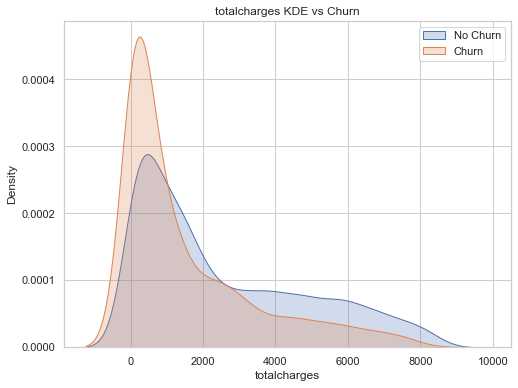

In [35]:
def boxplot_numerical_vs_churn(df, numerical_column, churn_column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=churn_column, y=numerical_column, data=df)
    plt.title(f'{numerical_column} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(numerical_column)
    plt.show()
    
def kdeplot_numerical_vs_churn(df, numerical_column, churn_column):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[df[churn_column] == 0][numerical_column], label='No Churn', shade=True)
    sns.kdeplot(df[df[churn_column] == 1][numerical_column], label='Churn', shade=True)
    plt.title(f'{numerical_column} KDE vs Churn')
    plt.xlabel(numerical_column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
for column in numerical:
    boxplot_numerical_vs_churn(df, column, 'churn')
    kdeplot_numerical_vs_churn(df, column, 'churn')

# DATA PREPARTION AND ENCODING

In [36]:
X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
train_dict = X_train[categorical + numerical].to_dict(orient='records')
val_dict = X_test[categorical + numerical].to_dict(orient='records')

In [38]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_test = dv.transform(val_dict)

# TRAINING ON LOGISTIC REGRESSION

In [39]:
model = LogisticRegression(C=0.1, max_iter=1000)  # Adjust the value of C
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

# EVALUATION

In [40]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [41]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8204400283889283
Confusion Matrix:
 [[933 103]
 [150 223]]


In [42]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [43]:
# ROC Curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

AUC-ROC: 0.749217189230594


**AUC-ROC (Area Under the ROC Curve): 0.7492**

AUC-ROC measures the area under the receiver operating characteristic curve, which evaluates the model's ability to distinguish between positive and negative cases. An AUC-ROC of 0.7492 indicates that the model is decent at discriminating between the two classes, but there is room for improvement.

In [44]:
# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
print("AUC-PR:", pr_auc)

AUC-PR: 0.5154207996515202


**AUC-PR (Area Under the Precision-Recall Curve): 0.5154**

AUC-PR measures the area under the precision-recall curve. An AUC-PR of 0.5154 suggests that the model's precision-recall trade-off is not very favorable, and there is room for improvement in precision and recall.

In [45]:
# Specificity (True Negative Rate)
tn = confusion[0, 0]
specificity = tn / (tn + confusion[0, 1])
print("Specificity:", specificity)

Specificity: 0.9005791505791506


**Specificity: 0.9006**

Specificity (True Negative Rate) measures the model's ability to correctly identify negative instances. A specificity of 0.9006 indicates that the model is good at correctly identifying non-churn cases (true negatives) and has a relatively low false-positive rate.

In [46]:
# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

MCC: 0.5214579037952954


**Matthews Correlation Coefficient (MCC): 0.5215**

MCC is a measure of the quality of a binary classification. An MCC of 0.5215 indicates a moderate level of agreement between the actual and predicted classes. It suggests that your model is making predictions better than random chance but still has room for improvement.


# CONCLUSION

Here are some conclusions based on these metrics:

The model's performance is better than random chance, but there is room for improvement, especially in terms of precision-recall trade-off.
The model is particularly strong at correctly identifying non-churn cases (high specificity), which is a positive characteristic for applications where false positives are costly.
To improve the model's performance, you can consider fine-tuning hyperparameters, feature engineering, or trying different algorithms.

# RAW PREDICTIONS

In [47]:
customer_1 = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}
customer_2 = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [48]:
def predict(customer):
    sample = dv.transform([customer])
    churn_probability = model.predict_proba(sample)[0, 1]
    not_churn_probability = model.predict_proba(sample)[0, 0]
    churn_prediction = (churn_probability > 0.5).astype(int)
    if churn_prediction == 1:
        return f"The customer is predicted to churn with Probability of {churn_probability*100:.2f}%, Probability of not churning: {not_churn_probability*100:.2f}%"
    else:
        return f"The customer is predicted to not churn. Probability of not churning: {not_churn_probability*100:.2f}%, Probability of churning: {churn_probability*100:.2f}%"


In [49]:
predict(customer_1)

'The customer is predicted to not churn. Probability of not churning: 93.57%, Probability of churning: 6.43%'

In [50]:
predict(customer_2)

'The customer is predicted to churn with Probability of 80.26%, Probability of not churning: 19.74%'